<div style="text-align: center;">
  <h2><strong></strong></h2>
</div>

<center>

## **Prueba Técnica Novaventa**
## **Análisis exploratorio de Datos**

**Autor:** Sebastian Carvalho Salazar  

</center>

## Librerias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import IncrementalPCA
from scipy import sparse
import time
import numpy as np
import seaborn as sns

## Rutas

In [3]:
import yaml
import os

# Obtener la ruta absoluta del archivo paths.yaml
current_dir = current_dir = os.getcwd()
config_path = os.path.join(current_dir, '..', 'Config', 'paths.yaml')

# Cargar el contenido del archivo YAML
with open(config_path, 'r') as file:
    paths = yaml.safe_load(file)

## Datos

In [26]:
path_1 = paths['StagingZone']['dataset_1']
dataset_1 = pd.read_csv(path_1, sep=";").drop(['Unnamed: 0'], axis=1)

path_2 = paths['StagingZone']['dataset_2']
dataset_2 = pd.read_csv(path_2, sep=";").drop(['Unnamed: 0'], axis=1)

C:\Users\SEBASTIAN\AppData\Local\Temp\ipykernel_18256\693459292.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_categoria.values, y=ventas_por_categoria.index, palette="viridis")


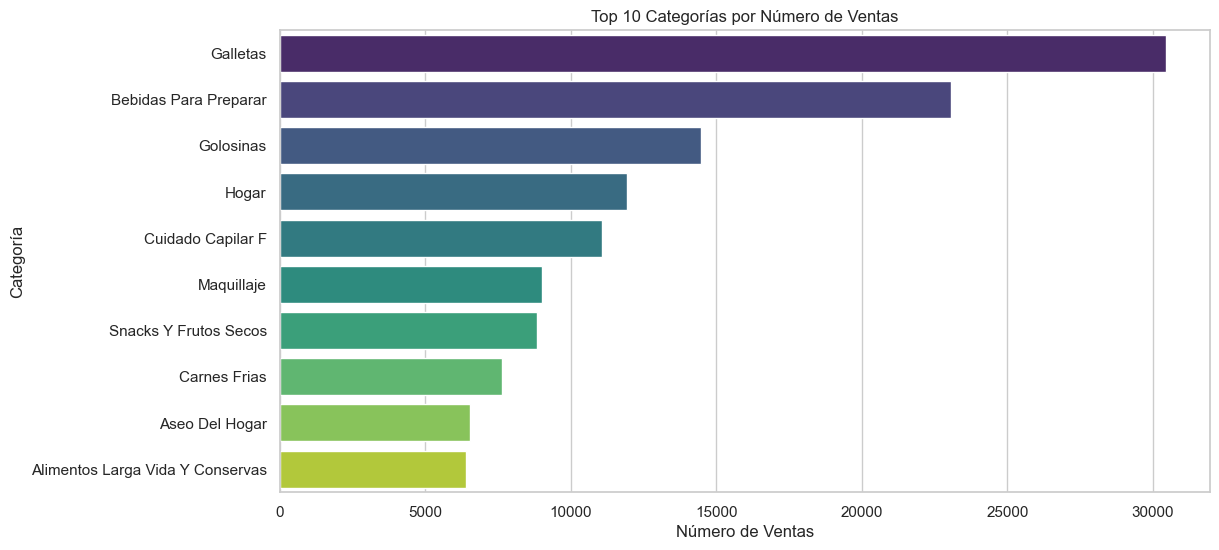

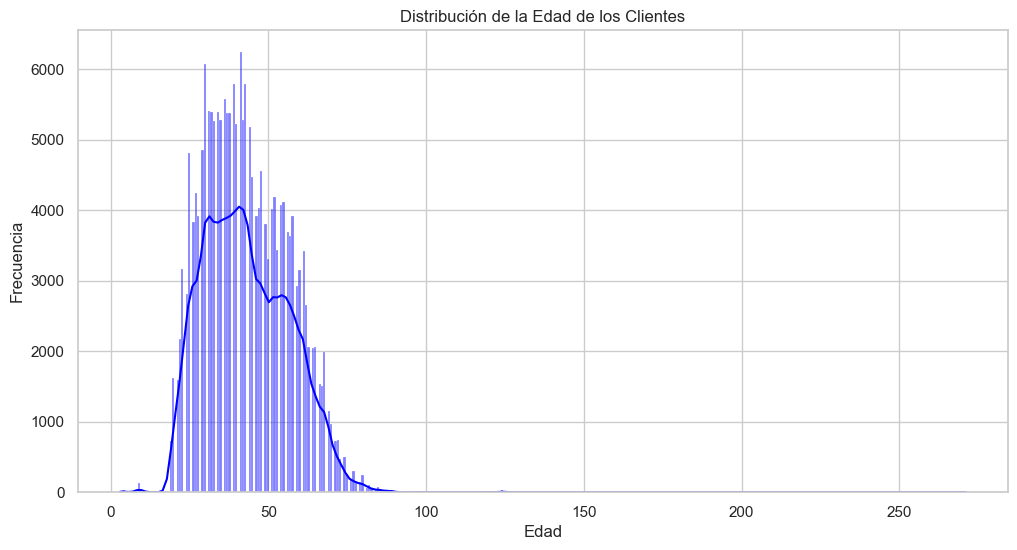

C:\Users\SEBASTIAN\AppData\Local\Temp\ipykernel_18256\693459292.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=compras_por_departamento.values, y=compras_por_departamento.index, palette="magma")


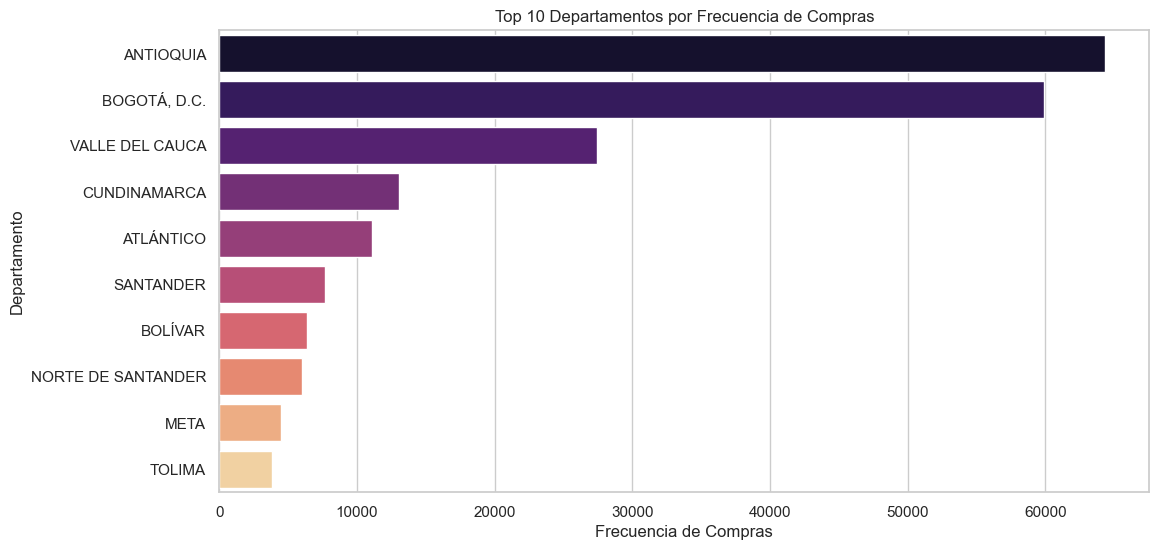

C:\Users\SEBASTIAN\AppData\Local\Temp\ipykernel_18256\693459292.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_departamento['counts'], y=ventas_departamento['DEPARTAMENTO'], palette="coolwarm")


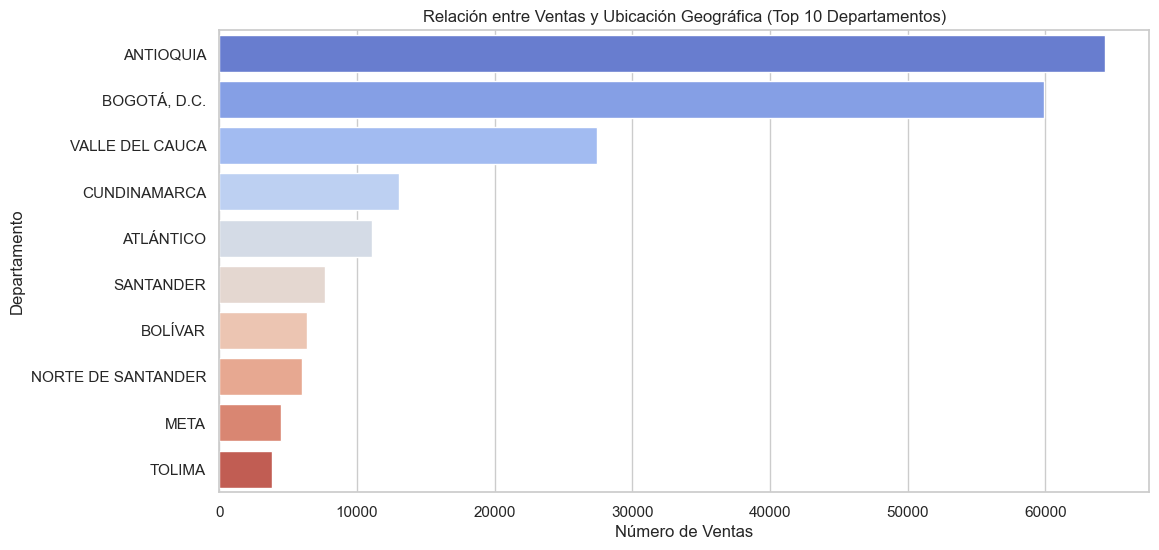

In [30]:


# Ajustes de estilo para los gráficos
sns.set(style="whitegrid")

# 1. Distribución de ventas por categoría
plt.figure(figsize=(12, 6))
ventas_por_categoria = dataset_1['CATEGORIA'].value_counts().head(10)
sns.barplot(x=ventas_por_categoria.values, y=ventas_por_categoria.index, palette="viridis")
plt.title('Top 10 Categorías por Número de Ventas')
plt.xlabel('Número de Ventas')
plt.ylabel('Categoría')
plt.show()

# 2. Distribución de la edad de los clientes
plt.figure(figsize=(12, 6))
sns.histplot(dataset_2['EDAD'].dropna(), kde=True, color='blue')
plt.title('Distribución de la Edad de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# 3. Frecuencia de compras por departamento
plt.figure(figsize=(12, 6))
compras_por_departamento = dataset_2['DEPARTAMENTO'].value_counts().head(10)
sns.barplot(x=compras_por_departamento.values, y=compras_por_departamento.index, palette="magma")
plt.title('Top 10 Departamentos por Frecuencia de Compras')
plt.xlabel('Frecuencia de Compras')
plt.ylabel('Departamento')
plt.show()

# 4. Relación entre las ventas y la ubicación geográfica
ventas_departamento = dataset_2.groupby('DEPARTAMENTO').size().reset_index(name='counts')
ventas_departamento = ventas_departamento.sort_values(by='counts', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=ventas_departamento['counts'], y=ventas_departamento['DEPARTAMENTO'], palette="coolwarm")
plt.title('Relación entre Ventas y Ubicación Geográfica (Top 10 Departamentos)')
plt.xlabel('Número de Ventas')
plt.ylabel('Departamento')
plt.show()

# Conclusiones del Análisis Exploratorio

## Categorías de Productos:
- La categoría más popular es "Galletas", seguida por otras categorías de productos de consumo rápido como "Cuidado Capilar" y "Cuidado Oral".
- La concentración de ventas en pocas categorías sugiere que estos productos son los más atractivos para los consumidores, lo que puede ser útil para estrategias de marketing y abastecimiento.

## Distribución de la Edad de los Clientes:
- La mayoría de los clientes tienen entre 30 y 50 años, con un pico alrededor de los 40 años.
- Existen valores atípicos en la edad que deben ser revisados, ya que edades extremas como menores a 10 años y mayores a 100 años no son realistas.

## Frecuencia de Compras por Departamento:
- Antioquia y Bogotá, D.C., lideran en frecuencia de compras, lo que puede indicar una alta concentración de clientes en estas áreas.
- Estos departamentos deberían ser focales para campañas de marketing y expansiones comerciales.

## Relación entre Ventas y Ubicación Geográfica:
- Las ventas están altamente concentradas en unos pocos departamentos, con Antioquia y Bogotá, D.C., siendo los principales.
- La distribución geográfica sugiere que las estrategias de expansión y distribución deben enfocarse en estos departamentos para maximizar el alcance y la eficiencia.

# Recomendaciones

## Segmentación de Clientes:
- Utilizar la información demográfica y de compra para segmentar a los clientes y personalizar las campañas de marketing.
- Identificar y abordar a los segmentos con mayor frecuencia de compra y valor de ventas.

## Validación de Datos:
- Revisar y limpiar los datos de edad para eliminar valores atípicos y errores.
- Asegurar la calidad de los datos de género y ubicación para un análisis más preciso.

## Optimización del Inventario:
- Priorizar el inventario de las categorías más vendidas y realizar un seguimiento de las tendencias para anticipar la demanda.
- Considerar alianzas con proveedores clave de las categorías más populares.

## Estrategias de Expansión:
- Enfocar las estrategias de expansión y distribución en los departamentos con mayor concentración de clientes.
- Desarrollar iniciativas locales en Antioquia y Bogotá, D.C., para fortalecer la presencia y capturar más mercado.


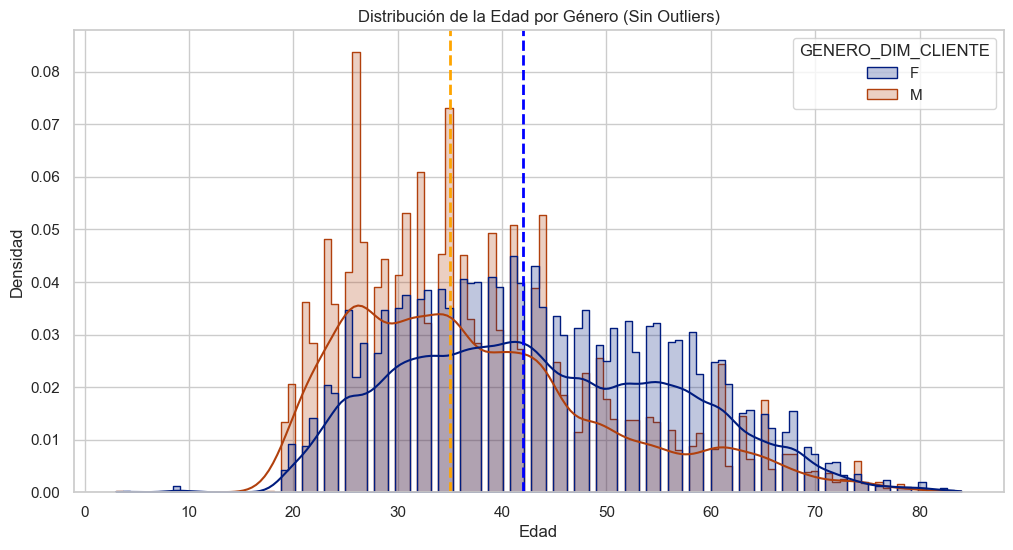

Rechazamos la hipótesis nula. Existe una diferencia significativa en las edades entre hombres y mujeres.
Las mujeres tienen una edad mediana superior.
El p-valor es: 0.0


In [51]:
from scipy.stats import mannwhitneyu

# Definir una función para eliminar outliers utilizando el rango intercuartil
def eliminar_outliers_iqr(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[columna] >= lower_bound) & (df[columna] <= upper_bound)]

# Aplicar la función para eliminar outliers en la columna 'EDAD'
dataset_filtered_sin_outliers = eliminar_outliers_iqr(dataset_2, 'EDAD')
dataset_filtered_sin_outliers = dataset_filtered_sin_outliers[dataset_filtered_sin_outliers['GENERO_DIM_CLIENTE'].isin(['M','F'])]

# Preparar los datos para la prueba de Mann-Whitney sin outliers
edades_femenino_sin_outliers = dataset_filtered_sin_outliers[dataset_filtered_sin_outliers['GENERO_DIM_CLIENTE'] == 'F']['EDAD']
edades_masculino_sin_outliers = dataset_filtered_sin_outliers[dataset_filtered_sin_outliers['GENERO_DIM_CLIENTE'] == 'M']['EDAD']

# Realizar la prueba de Mann-Whitney sin outliers
stat_sin_outliers, p_value_sin_outliers = mannwhitneyu(edades_femenino_sin_outliers, edades_masculino_sin_outliers, alternative='two-sided')

# Calcular las medianas
mediana_h = np.median(edades_femenino_sin_outliers)
mediana_m = np.median(edades_masculino_sin_outliers)

# Distribución de la edad por género sin outliers
plt.figure(figsize=(12, 6))
sns.histplot(data=dataset_filtered_sin_outliers, x='EDAD', hue='GENERO_DIM_CLIENTE', kde=True, element='step', stat='density', common_norm=False, palette='dark')
plt.axvline(mediana_h, color='blue', linestyle='dashed', linewidth=1, label=f'Mediana Hombres: {mediana_h:.2f}',lw=2)
plt.axvline(mediana_m, color='orange', linestyle='dashed', linewidth=1, label=f'Mediana Mujeres: {mediana_m:.2f}', lw=2)
plt.title('Distribución de la Edad por Género (Sin Outliers)')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.show()

alpha = 0.05
if p_value_sin_outliers < alpha:
    print('Rechazamos la hipótesis nula. Existe una diferencia significativa en las edades entre hombres y mujeres.')
    if edades_femenino_sin_outliers.median() > edades_masculino_sin_outliers.median():
        print('Las mujeres tienen una edad mediana superior.')
    else:
        print('Los hombres tienen una edad mediana superior.')
else:
    print('No rechazamos la hipótesis nula. No existe una diferencia significativa las edades entre hombres y mujeres.')

print(f"El p-valor es: {p_value_sin_outliers}")

La identificación de diferencias significativas en la distribución de edades entre clientes masculinos y femeninos es crucial para un e-commerce, ya que permite la creación de estrategias de marketing más efectivas y segmentadas. Conociendo que las preferencias y comportamientos de compra pueden variar con la edad y el género, las campañas promocionales pueden ser diseñadas para resonar mejor.

# FIN
---